<a href="https://colab.research.google.com/github/dharpranoy/Neural-Net-GoogleColab/blob/main/Minst_Handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
import tensorflow_datasets as tfds

In [2]:
dataset, metadata = tfds.load(name='mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
train_no=metadata.splits['train'].num_examples
test_no=metadata.splits['test'].num_examples
train_no,test_no

(60000, 10000)

In [4]:
def normalize(images,labels):
  images=tf.cast(x=images,dtype='float32')
  images /= 255
  return images,labels  
train_dataset=train_dataset.map(map_func=normalize)
test_dataset=test_dataset.map(map_func=normalize)

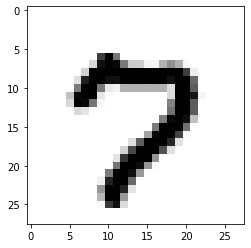

In [5]:
for img,lbl in train_dataset.take(count=4):
  img=img.numpy().reshape(28,28)
  plt.imshow(X=img,cmap=plt.cm.binary)

In [6]:

model=tf.keras.Sequential(layers=[
          tf.keras.layers.Flatten(input_shape=(28,28,1)),
          tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
          tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
          tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)                               
])

In [7]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:
BATCH=32
train_dataset=train_dataset.batch(BATCH)
#test_dataset=test_dataset.batch(BATCH)

In [9]:
import math
model.fit(x=train_dataset,
      epochs=10,
      steps_per_epoch=int(math.ceil(train_no/BATCH)))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2376 - accuracy: 0.9296
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0983 - accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0659 - accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0482 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0376 - accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0299 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0244 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0250 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0184 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

4


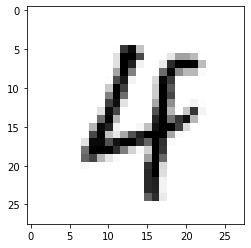

In [17]:
from skimage import transform
import random
for test_img,test_label in test_dataset.take(count=random.randint(1,50)):
  test_img=test_img.numpy().reshape(28,28)
  plt.imshow(X=test_img,cmap=plt.cm.binary)
test_img=transform.resize(test_img,(28,28,1))
test_img=np.expand_dims(test_img,axis=0)
print(np.argmax(a=model.predict(test_img)))

5


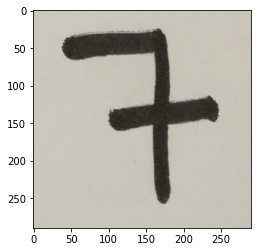

In [16]:
import PIL
import numpy
from skimage import transform
img_drive=PIL.Image.open(r"/content/sev.jpg")
plt.imshow(X=img_drive)
img_drive=numpy.array(img_drive).astype('float32')/255
img_drive=transform.resize(img_drive,(28,28,1))
img_drive=np.expand_dims(img_drive,axis=0)
print(np.argmax(a=model.predict(img_drive)))